In [4]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt 
import seaborn as sns

In [5]:
#setup

v = 49
gamma = 1.5
lamda = 2
omega = 1 

n = 1000

In [6]:
def linearmodel(q):
    
    num_simulations = 1000

    p_c_s = []
    p_c_rd = []
    p_equals_c_s = []
    p_equals_c_rd = []


    for sim in np.arange(num_simulations): 

        # step 1 & 2
        u_1 = []
        u_2 = []

        for i in np.arange(n):
            u_1.append(random.randrange(0, 10000, 1))
            u_2.append(random.randrange(0, 10000, 1))

        d = {'u_1': u_1, 'u_2': u_2}
        df = pd.DataFrame(data=d)

        df["p"] = df["u_1"].rank(ascending=False)
        df["help"] = df["u_2"].rank(ascending=False)
        df["a"] = q*df['p'] + (1-q)*df['help']
        df["c_0"] = df["a"].rank(ascending=True)

        #step 3
        e_s = v**(1/gamma)
        e_1 = ((1+omega)*v)**(1/gamma)
        e_2 = ((1 + (omega * lamda)) * v)**(1/gamma)

        df['I'] = (df['c_0'] >= df['p']).astype(int)

        #step 4
        df['u_s'] = df['c_0'] - e_s
        df['c_s'] = df['u_s'].rank(ascending=True)

        conditions = [
            (df['c_0'] - e_2) > df['p'],
            (df['c_0'] - e_1) <= df['p'],
            ((df['c_0'] - e_2) < df['p']) & ((df['c_0'] - e_1) > df['p'])
        ]

        choices = [df['c_0'] - e_2, df['c_0'] - e_1, df['p']]

        df['u_rd'] = np.select(conditions, choices)
        df['c_rd'] = df['u_rd'].rank(ascending=True)

        #step 5
        p_c_s.append(df['p'].corr(df['c_s']))
        p_c_rd.append(df['p'].corr(df['c_rd']))

        p_equals_c_s.append(sum(df['p'] == df['c_s']))
        p_equals_c_rd.append(sum(df['p'] == df['c_rd']))
        
    plt.hist(p_c_s, bins=100, alpha=0.6, lw=1, label="p_c_s")
    plt.hist(p_c_rd, bins=100, alpha=0.6, lw=1, label="p_c_rd")
    plt.legend()
    plt.show()
    
    return df['c_0'].corr(df['p'])

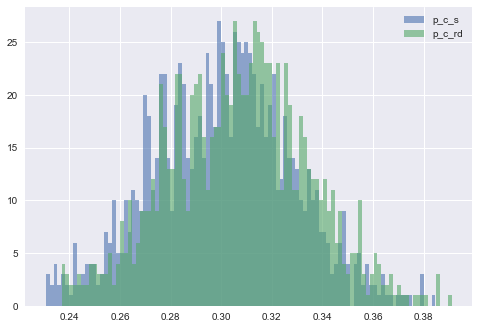

0.27176155540451868

In [ ]:
# q = 0.25
linearmodel(0.25)

In [ ]:
# q = 0.5
linearmodel(0.5)

In [ ]:
# q = 0.75
linearmodel(0.75)

## Percentile Comparison

In [65]:
bottom = 0.5
top = 0.25

In [66]:
df['p_percentile'] = (df['p'].rank(pct = True))
df['c_percentile'] = (df['c_rd'].rank(pct = True))

percent_upwards = len(df.loc[(df['p_percentile'] > bottom) & (df['c_percentile'] <= top)]) / len(df) * 100 
percent_downwards = len(df.loc[(df['p_percentile'] <= top) & (df['c_percentile'] > bottom)]) / len(df) * 100

In [67]:
percent_upwards, percent_downwards

(9.8, 11.4)